In [71]:
import transdist
import imp
imp.reload(wind)
import wind
import pandas as pd
import numpy as np
import geopandas as gpd
import requests
from shapely.geometry import Point
from matplotlib import pyplot as plt
%matplotlib inline
import time # NB: Use to limit rate of making requests to a website
print('Libraries loaded.')

Libraries loaded.


In [6]:
import gmaps
import os
gmaps.configure(api_key=os.environ["GOOGLE_API_KEY"])
import json

In [141]:
with open('special_gdf.geojson','r') as f : 
    special_gdf_geojson = json.load(f)
trans_layer = gmaps.geojson_layer(special_gdf_geojson,stroke_color=(0,0,0))

In [137]:
grid_div = 10
lat_range = np.linspace(32.5,transdist.MAX_LAT,grid_div)
lon_range = np.linspace(-118.5,-114,grid_div)
point_grid = np.meshgrid(lat_range,lon_range,indexing='ij')
grid_point_list = [(lat,lon) for lat,lon in zip(point_grid[0].ravel(),point_grid[1].ravel())]
grid_layer = gmaps.symbol_layer(
    grid_point_list, fill_color="red", stroke_color="red", scale=3
)


In [146]:
trans_idx_list,trans_point_list,trans_dist_list = list(zip(*[transdist.find_closest_trans_point(latlon) for latlon in grid_point_list]))
trans_grid_layer = gmaps.symbol_layer(
    trans_point_list, fill_color=(255,0,255), stroke_color=(255,0,255), scale=3
)

In [148]:
# closest_layer = gmaps.symbol_layer(
#     [closest_point], fill_color="red", stroke_color="red", scale=2
# )
# target_layer = gmaps.symbol_layer(
#     [latlon], fill_color=(0,255,0), stroke_color=(0,255,0), scale=2
# )

fig = gmaps.figure(
    layout={
        'width': '800px',
        'height': '600px',
    })
fig.add_layer(trans_layer)
fig.add_layer(grid_layer)
fig.add_layer(trans_grid_layer)
fig

Figure(layout=FigureLayout(height='600px', width='800px'))

In [129]:
wind_farm_data = pd.read_pickle('data/select-wind-power.pkl')
#features = ['mean_wind_speed','mean_cubed_wind_speed','elevation']
features = wind.features
model = wind.fit_model(wind_farm_data,features)

cross validation scores: [ 0.39319975 -0.28086299 -0.05885783 -0.8864213   0.12697556]
training data
0.3155372391826523
testing data
-1.7370507102813981


In [57]:
nrel = wind.setup_nrel()

In [121]:
%time testX1 = np.array([wind.latlon_to_features(nrel,latlon,wind.features) for latlon in trans_point_list])
testX2 = np.array([wind.latlon_to_features(nrel,latlon,wind.features) for latlon in grid_point_list])

CPU times: user 4.87 s, sys: 431 ms, total: 5.3 s
Wall time: 1min 49s


In [122]:
y1 = model.predict(testX1)
y2 = model.predict(testX2)
y = np.concatenate((y2,y1))

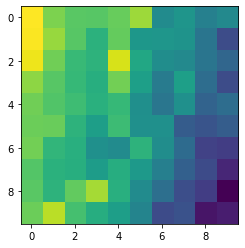

In [131]:
plt.imshow(y2.reshape(10,10))

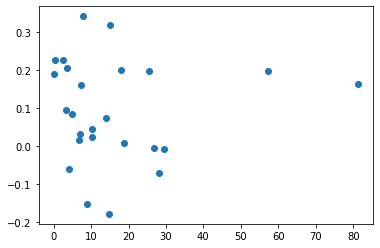

In [100]:
plt.scatter(trans_dist_list,y1)

In [150]:
#pd.read_pickle('data/select-wind-power.pkl').to_pickle('data/select-wind-power_p3.pkl',protocol = 3)

In [149]:
#fopt_grid_vals.to_pickle('test_opt_grid_vals_10x10_p3.pkl',protocol=3)

In [125]:
lats, lons = zip(*(grid_point_list + list(trans_point_list)))
opt_grid_vals = pd.DataFrame({'latitude' : lats, 'longitude' : lons,
              'frac_capacity' : y, 'trans_dist' : (list(trans_dist_list)+[0 for _ in grid_point_list])})
#fopt_grid_vals.to_pickle('test_opt_grid_vals_10x10.pkl')

In [115]:
opt_grid_vals

,latitude,longitude,frac_capacity,trans_dist
0,32.500000,-118.500000,0.376165,0.000000
1,32.500000,-117.375000,0.229288,0.000000
2,32.500000,-116.250000,0.327096,0.000000
3,32.500000,-115.125000,0.077938,0.000000
4,32.500000,-114.000000,0.051991,0.000000
5,32.993125,-118.500000,0.303038,0.000000
6,32.993125,-117.375000,0.155764,0.000000
7,32.993125,-116.250000,0.159645,0.000000
8,32.993125,-115.125000,0.028600,0.000000
9,32.993125,-114.000000,-0.011693,0.000000
